In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset
df = pd.read_csv('/content/vehicle_price.csv')

In [3]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [4]:
df.shape

(1002, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

# Data Pre-Processing

In [6]:
#  descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1002.0,2023.916168,0.298109,2023.0,2024.0,2024.0,2024.0,2025.0
price,979.0,50202.985700,18700.392062,0.0,36600.0,47165.0,58919.5,195895.0
cylinders,897.0,4.975474,1.392526,0.0,4.0,4.0,6.0,8.0
mileage,968.0,69.033058,507.435745,0.0,4.0,8.0,13.0,9711.0
doors,995.0,3.943719,0.274409,2.0,4.0,4.0,4.0,5.0


In [7]:
# descriptive statistic for categorical values
df.describe(include ='object').T

,count,unique,top,freq
name,1002,358,2023 Dodge Durango Pursuit,33
description,946,761,\n \n .\n \n,13
make,1002,28,Jeep,194
model,1002,153,Hornet,65
engine,1000,100,16V GDI DOHC Turbo,130
fuel,995,7,Gasoline,664
transmission,1000,38,8-Speed Automatic,325
trim,1001,197,Limited,69
body,999,8,SUV,704
exterior_color,997,263,Bright White Clearcoat,81


In [8]:
#checking for null values
df.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


In [9]:
#dropping the description column as it is not required
df = df.drop(['description'], axis = 1)

In [10]:
from pandas.core.algorithms import value_counts
print(df.transmission.value_counts(),'\n', df.fuel.value_counts(),'\n', df.body.value_counts() )

transmission
8-Speed Automatic                              325
Automatic                                      236
6-Speed Automatic                               98
1-Speed Automatic                               69
9-Speed Automatic                               62
10-Speed Automatic                              58
Automatic CVT                                   45
8-Speed Automatic with Auto-Shift               17
7-Speed DSGA? Automatic w/ 4MO                  11
8-Speed Automatic with Tiptronic                10
CVT                                              9
6-Spd Aisin F21-250 PHEV Auto Trans              7
8-speed automatic                                5
7-Speed DSG Automatic with Tiptronic             4
6-Speed Automatic Electronic with Overdrive      4
9-Speed 948TE Automatic                          4
8-Speed A/T                                      4
7-Speed Automatic with Auto-Shift                4
7-Speed Automatic S tronic                       4
Variable          

In [11]:
#deleting the missing rows in price(target variable)
df = df.dropna(subset = ['price'])

In [12]:
#imputing/ filling categorical column values with mode
cat_cols = ['engine','fuel','transmission','trim','body','exterior_color','interior_color']
for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace = True)

/tmp/ipython-input-931198053.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


In [13]:
#imputing the numerical columns with median values
num_cols = ['cylinders','mileage','doors']
for col in num_cols:
  df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-2623007671.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [14]:
df.isnull().sum()

,0
name,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0
transmission,0


In [15]:
#checking for duplicated values
df.duplicated().sum()

np.int64(31)

In [16]:
df[df.duplicated()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
58,2024 GMC Terrain SLE,GMC,Terrain,2024,35870.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,0.0,Automatic,SLE,SUV,4.0,Summit White,Jet Blk Premium Clth,All-wheel Drive
81,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
238,2024 GMC Terrain Denali,GMC,Terrain,2024,44120.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Ebony,Jet Blk,All-wheel Drive
246,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,21.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive
292,2023 Dodge Durango Pursuit,Dodge,Durango,2023,47340.0,16V MPFI OHV,8.0,Gasoline,33.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
353,2024 Jeep Compass Latitude,Jeep,Compass,2024,35999.0,16V GDI DOHC Turbo,4.0,Gasoline,0.0,8-Speed Automatic,Latitude,SUV,4.0,Metallic,Black,Four-wheel Drive
384,2024 Kia EV9 Light Long Range,Kia,EV9,2024,52388.0,c Motor,4.0,Electric,1.0,1-Speed Automatic,Light Long Range,SUV,4.0,Aurora Black Pearl,Gray,Rear-wheel Drive
391,2024 Kia Sportage EX,Kia,Sportage,2024,31190.0,16V PDI DOHC,4.0,Gasoline,10.0,8-Speed Automatic,EX,SUV,4.0,Glacial White Pearl,Black,Front-wheel Drive
398,2024 Mazda CX-90 PHEV Premium Plus,Mazda,CX-90 PHEV,2024,58399.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,4.0,Automatic,Premium Plus,SUV,4.0,Rhodium White Premium,Black,All-wheel Drive
403,2023 Dodge Charger SXT,Dodge,Charger,2023,35821.0,24V MPFI DOHC,6.0,Gasoline,20.0,8-Speed Automatic,SXT,Sedan,4.0,Black,Black,Rear-wheel Drive


In [17]:
#found 0 values in mileage
zero_mileage = df[df['mileage'] == 0]
print(zero_mileage)

                                       name       make           model  year  \
2                  2024 GMC Yukon XL Denali        GMC        Yukon XL  2024   
10               2024 Jeep Compass Latitude       Jeep         Compass  2024   
23                  2024 GMC Terrain Denali        GMC         Terrain  2024   
29                  2024 RAM 2500 Tradesman        RAM            2500  2024   
36        2024 Chevrolet Silverado 1500 RST  Chevrolet  Silverado 1500  2024   
..                                      ...        ...             ...   ...   
950                    2024 Honda CR-V EX-L      Honda            CR-V  2024   
974                    2024 Hyundai Kona SE    Hyundai            Kona  2024   
979      2024 Ford Bronco Sport Outer Banks       Ford    Bronco Sport  2024   
996                 2024 RAM 2500 Tradesman        RAM            2500  2024   
998  2024 Dodge Hornet Hornet R/T Plus Eawd      Dodge          Hornet  2024   

       price                           

Since mileage has 0 values for 109 rows which is not realistic so imputing them with median values by grouping with same brand

In [18]:
df['mileage'] = df.groupby(['make'])['mileage'].transform(lambda x: x.replace(0, x[x>0].median()))

print(df['mileage'].describe())


count     979.000000
mean       66.267109
std       501.880927
min         1.000000
25%         5.000000
50%         9.000000
75%        13.000000
max      9711.000000
Name: mileage, dtype: float64


# Exploratory Data Analysis

In this section , I will visualize the relationship between the target variable and independent variable and also explore correlation between the variables.

Univariate analysis of numerical columns

In [34]:
df['year'] = df['year'].round().astype(int)
df['doors'] = df['doors'].round().astype(int)

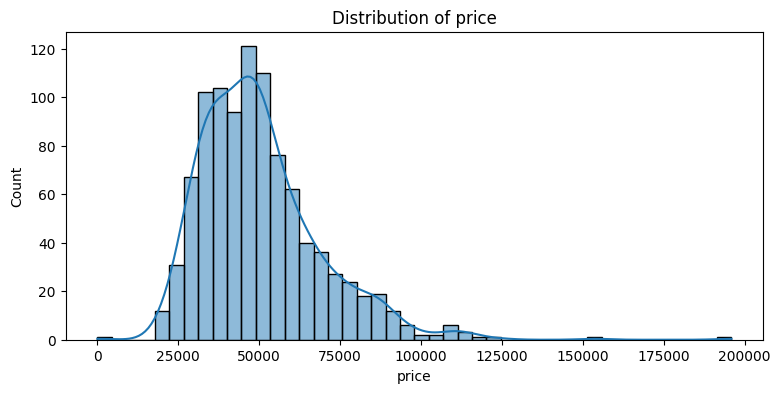

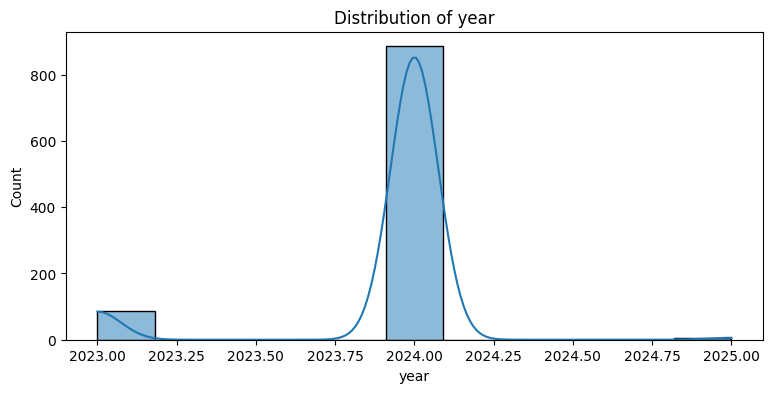

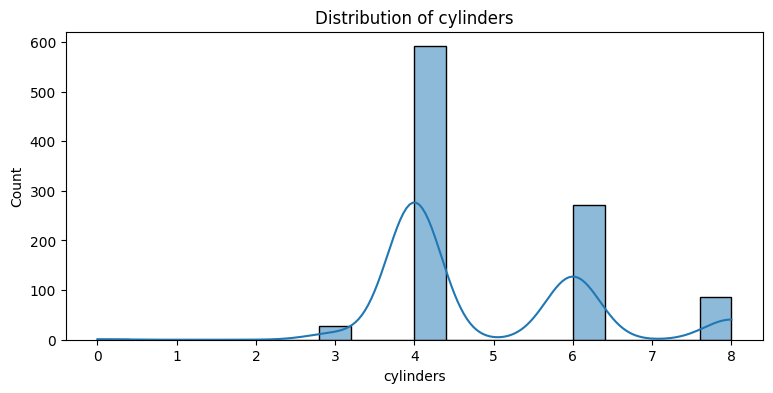

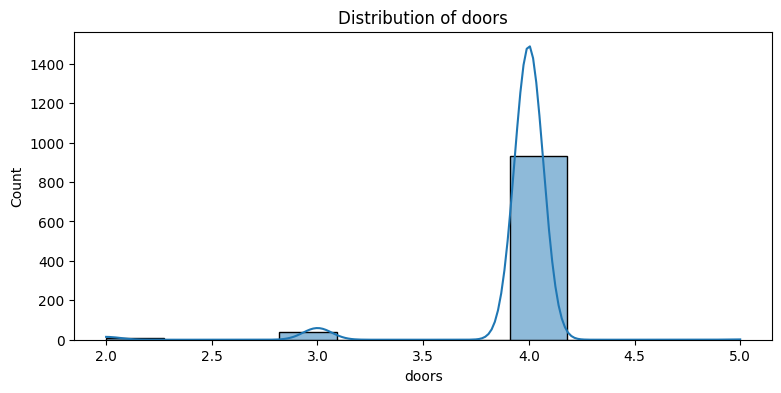

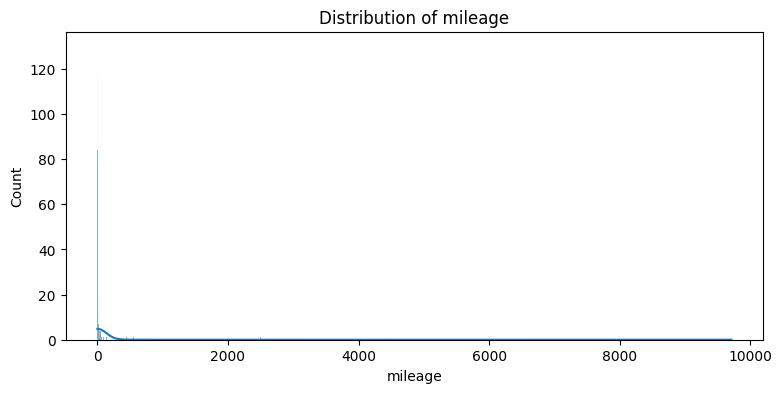

In [38]:
num_cols = ['price','year','cylinders','doors','mileage']
for col in num_cols:
    plt.figure(figsize=(9,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Univariate analysis of categorical columns

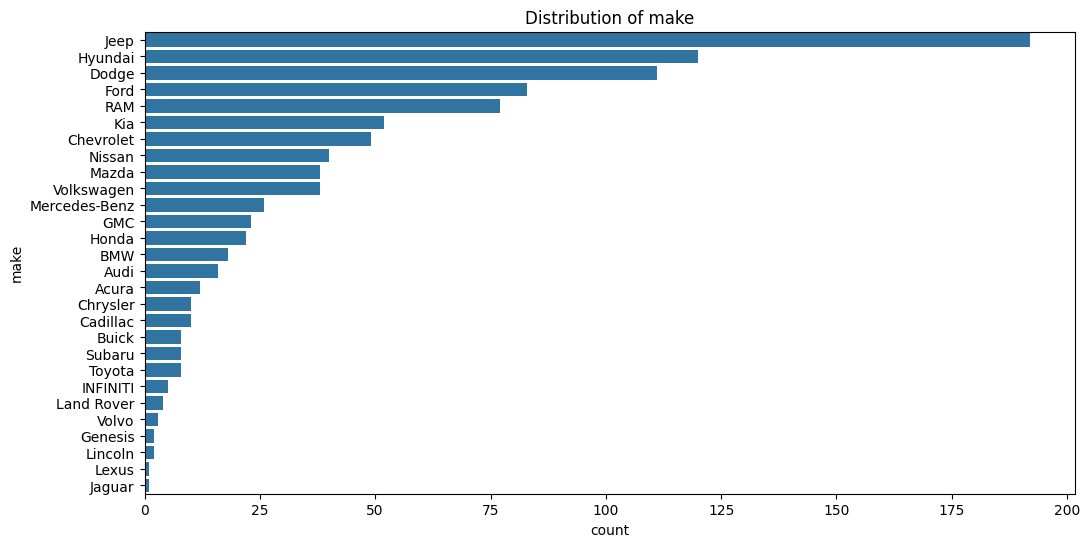

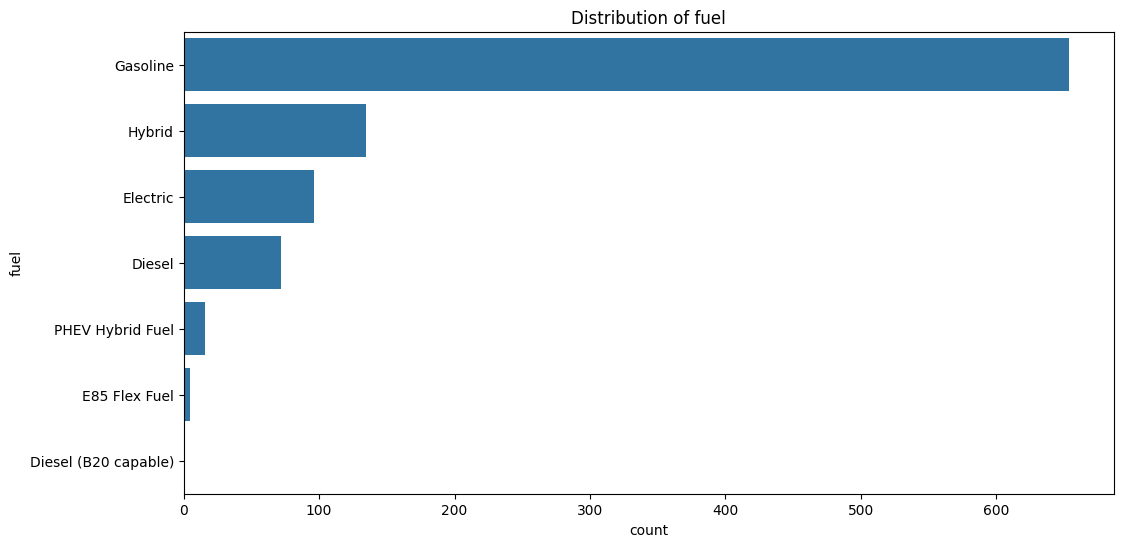

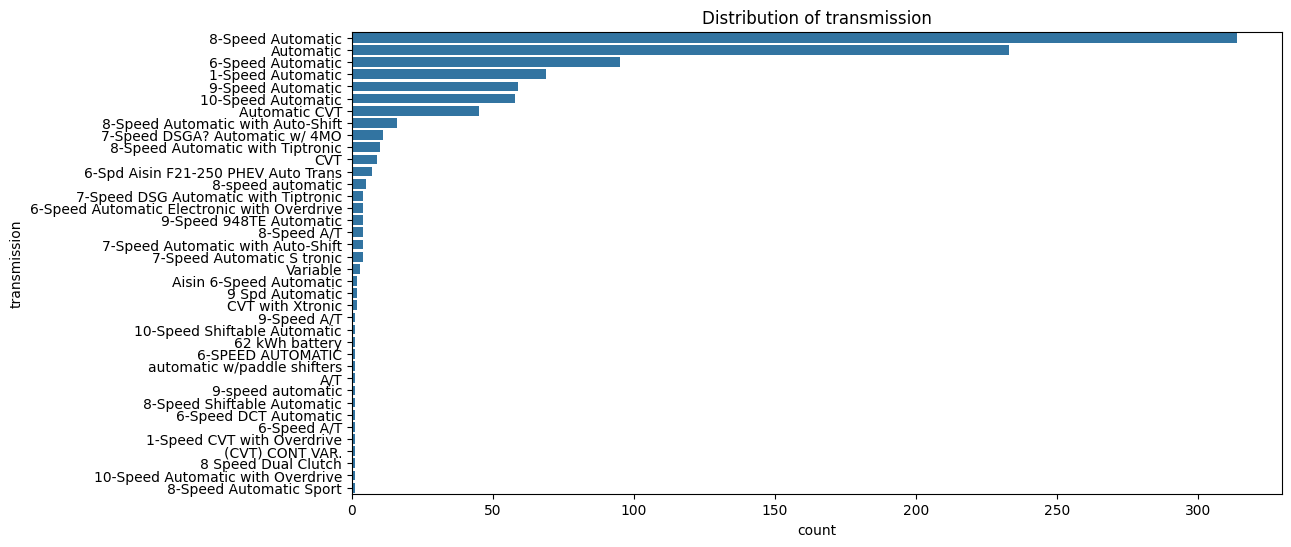

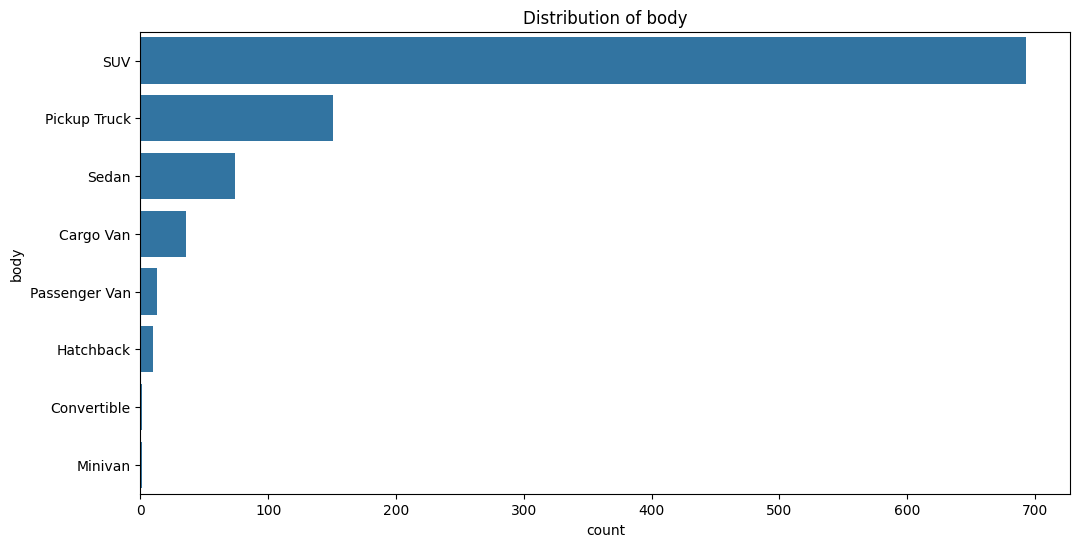

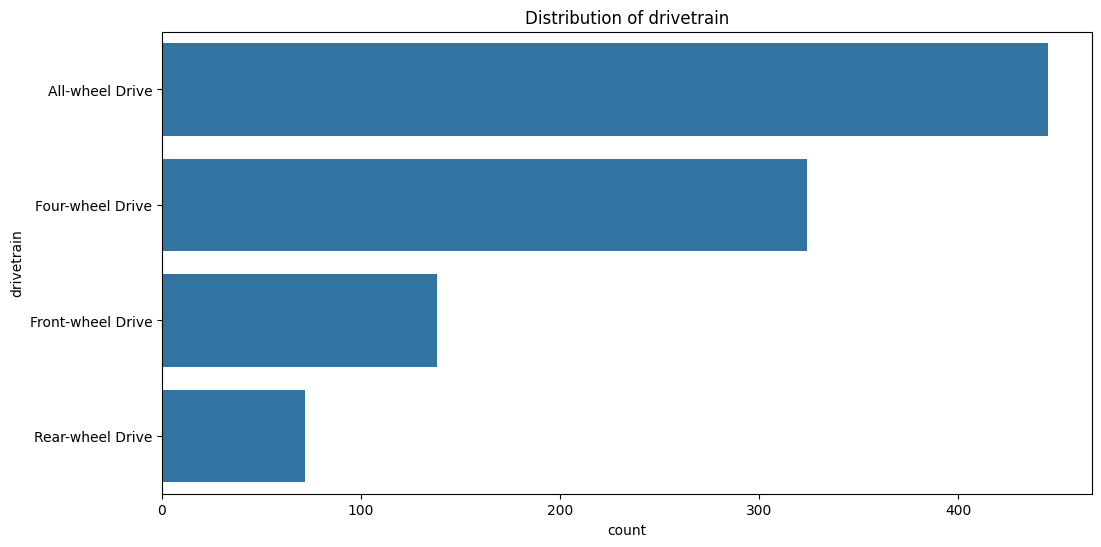

In [33]:
cat_cols = ['make', 'fuel', 'transmission', 'body','drivetrain']
for col in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


Bivariate analysis with the target variable Price

Vehicle price by year


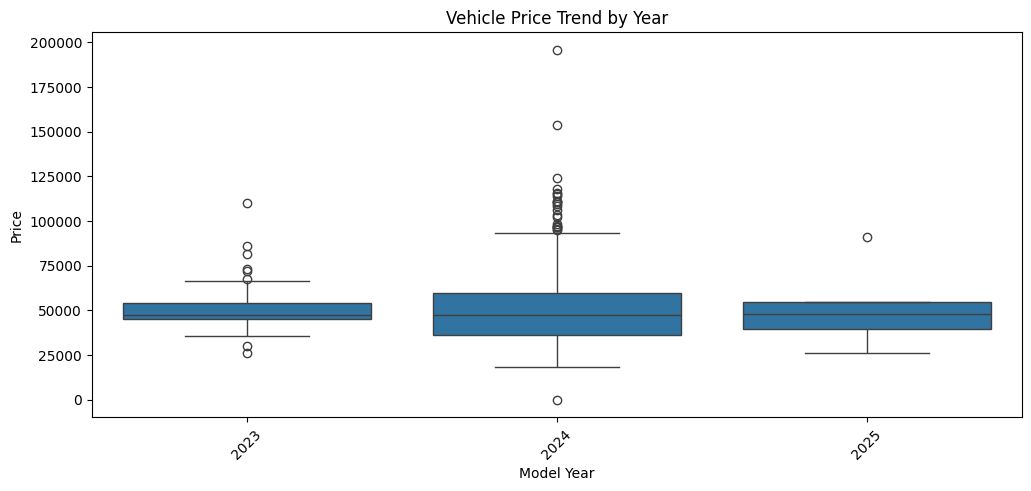

In [37]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='year', y='price')
plt.title('Vehicle Price Trend by Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Prices of the vehicle are higher during the year of 2024 with few outliers maybe indicating luxury vehicle prices

Price vs make

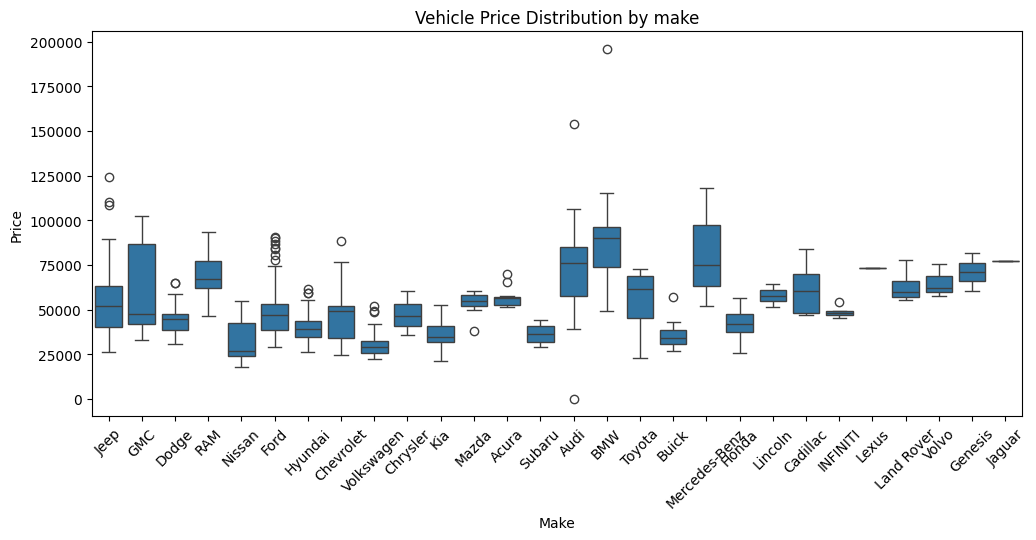

In [38]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='make', y='price')
plt.title('Vehicle Price Distribution by make')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Price vs Fuel type

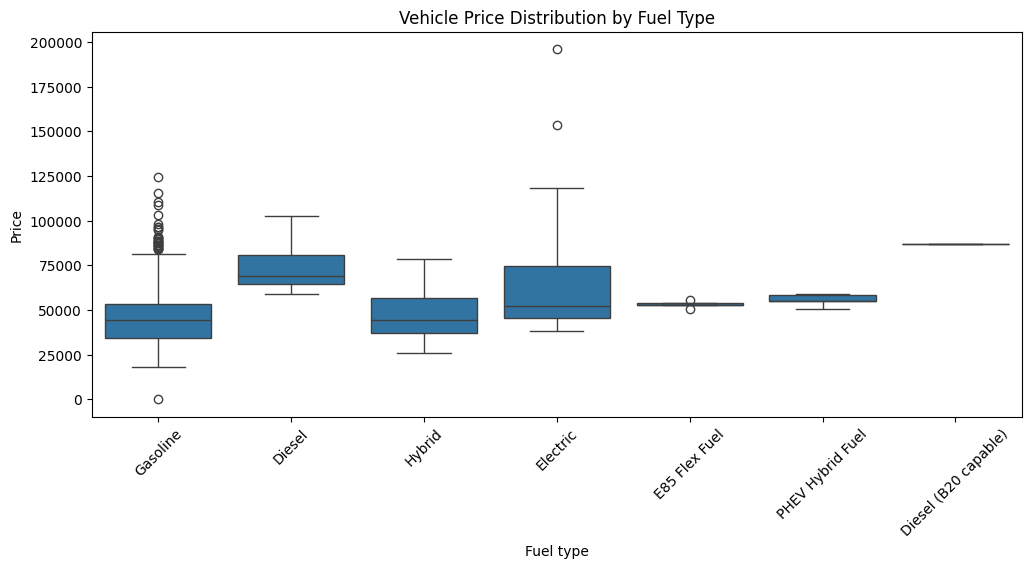

In [39]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='fuel', y='price')
plt.title('Vehicle Price Distribution by Fuel Type')
plt.xlabel('Fuel type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Diesel and Electric vehicles are higher in price with few exceptions or outliers in gasoline vehicles.

Price vs Body Type

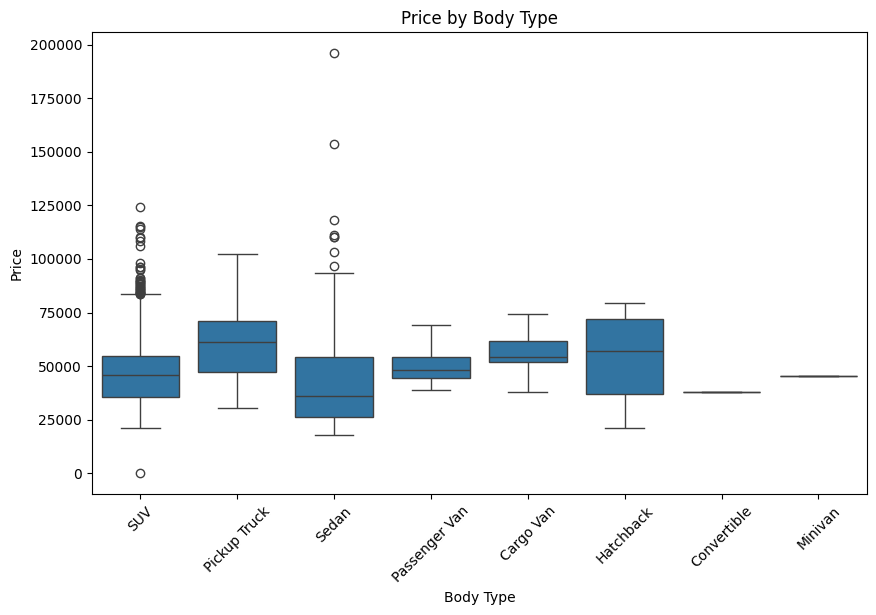

In [40]:
# Top 8 common body types
top_bodies = df['body'].value_counts().head(8).index

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['body'].isin(top_bodies)], x='body', y='price')
plt.title('Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Price vs Drive Train

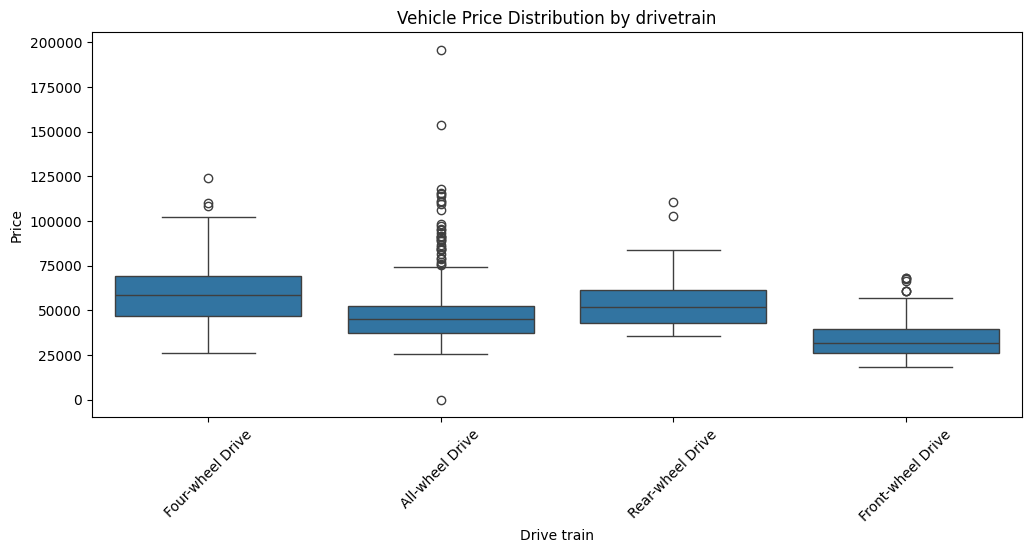

In [40]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='drivetrain', y='price')
plt.title('Vehicle Price Distribution by drivetrain')
plt.xlabel('Drive train')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Price vs Mileage

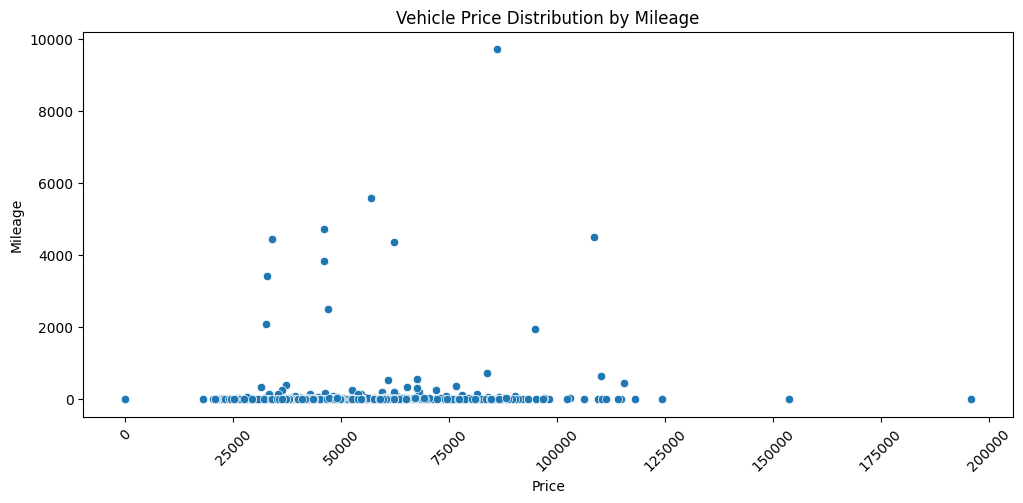

In [39]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='price', y='mileage')
plt.title('Vehicle Price Distribution by Mileage')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.xticks(rotation=45)
plt.show()

In [19]:
#outlier detection for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_outliers = df[(df['price'] < lower) | (df['price'] > upper)]

#printing the outlier
print(df_outliers)
print(df_outliers.shape)



                                       name           make           model  \
2                  2024 GMC Yukon XL Denali            GMC        Yukon XL   
81                 2024 GMC Yukon XL Denali            GMC        Yukon XL   
94               2024 Audi SQ5 Premium Plus           Audi             SQ5   
146  2024 Mercedes-Benz EQS 450 Base 4MATIC  Mercedes-Benz         EQS 450   
253  2024 Mercedes-Benz EQS 450 Base 4MATIC  Mercedes-Benz         EQS 450   
293                    2024 BMW i7 eDrive50            BMW              i7   
323          2024 Audi RS e-tron GT quattro           Audi    RS e-tron GT   
373  2024 Mercedes-Benz EQS 450 Base 4MATIC  Mercedes-Benz         EQS 450   
405       2024 Mercedes-Benz GLS 450 4MATIC  Mercedes-Benz         GLS 450   
413  2024 Mercedes-Benz EQS 450 Base 4MATIC  Mercedes-Benz         EQS 450   
419                         2024 BMW i5 M60            BMW              i5   
424                         2024 BMW i5 M60            BMW      

In [20]:
#outlier detection for mileage
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_outliers = df[(df['mileage'] < lower) | (df['mileage'] > upper)]

#printing the outlier
print(df_outliers)
print(df_outliers.shape)

                                        name       make               model  \
3                 2023 Dodge Durango Pursuit      Dodge             Durango   
5                2024 Nissan Murano Platinum     Nissan              Murano   
11                   2024 RAM 3500 Tradesman        RAM                3500   
16               2024 Nissan Murano Platinum     Nissan              Murano   
20                   2024 RAM 3500 Tradesman        RAM                3500   
...                                      ...        ...                 ...   
967                 2024 Kia Sportage X-Line        Kia            Sportage   
971                 2024 Kia Sportage X-Line        Kia            Sportage   
986   2024 Jeep Grand Cherokee 4xe Trailhawk       Jeep  Grand Cherokee 4xe   
992                  2024 RAM 3500 Tradesman        RAM                3500   
1001        2024 Chevrolet Silverado 2500 WT  Chevrolet      Silverado 2500   

      year    price                                

 There are 103 outliers in the mileage variable and deleting them would bias the modelling .So performing log transformation on the mileage variable

In [21]:
#log transformation on mileage variable
df['mileage_log'] = np.log1p(df['mileage'])

print(df['mileage_log'].describe())

count    979.000000
mean       2.370587
std        1.084397
min        0.693147
25%        1.791759
50%        2.302585
75%        2.639057
max        9.181118
Name: mileage_log, dtype: float64


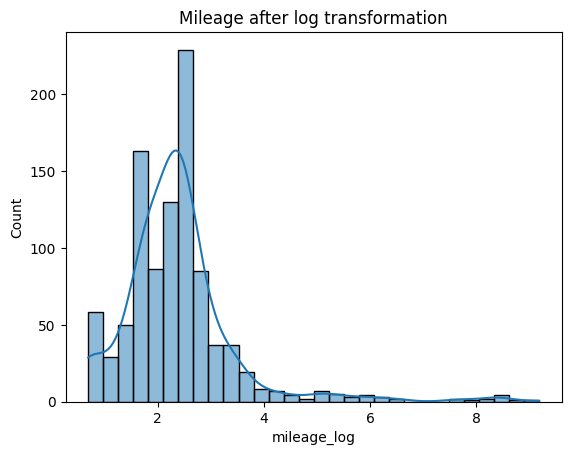

In [22]:

sns.histplot(df['mileage_log'], bins=30, kde=True)
plt.title("Mileage after log transformation")
plt.show()

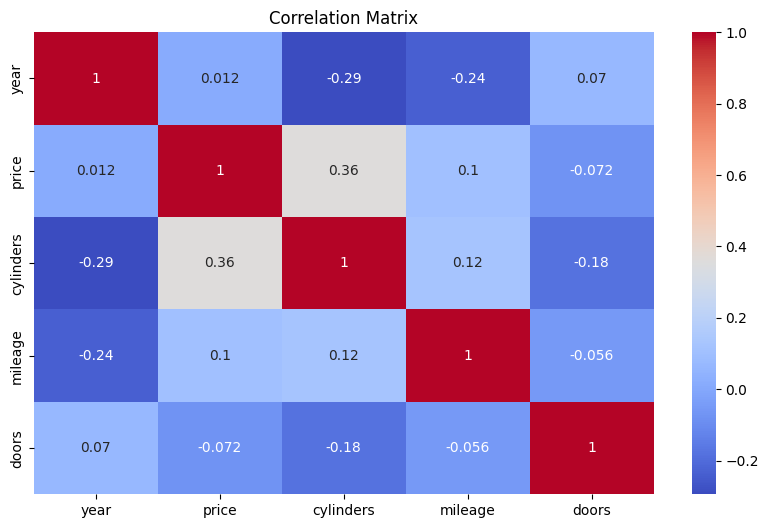

In [44]:
#plotting of correlation matix of numerical variables nj8im
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


No significant correlations is showing from the above matrix.

# Modelling

In [23]:
#one hot  encoding of categorical variables
cat_cols = ['make', 'model', 'fuel', 'transmission', 'trim',
                    'body', 'exterior_color', 'interior_color', 'drivetrain']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [24]:
#scaling the numerical variables
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
num_cols_to_scale = ['mileage_log', 'year', 'cylinders', 'doors']

scaler = MinMaxScaler()
df_encoded[num_cols_to_scale] = scaler.fit_transform(df_encoded[num_cols_to_scale])

In [25]:
#feature and target variable
X = df_encoded.drop(['price','name','engine'], axis=1)
y = df_encoded['price']


In [26]:
#splitting the training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Linear Regression

Linear Regression Performance:
MAE: 4742.58
RMSE: 7792.82
R² Score: 0.8011


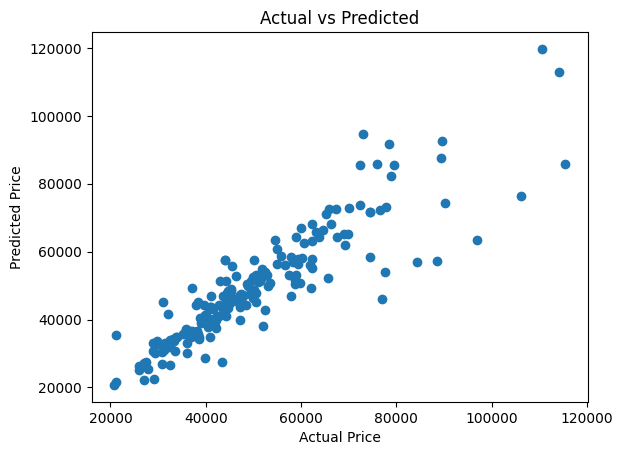

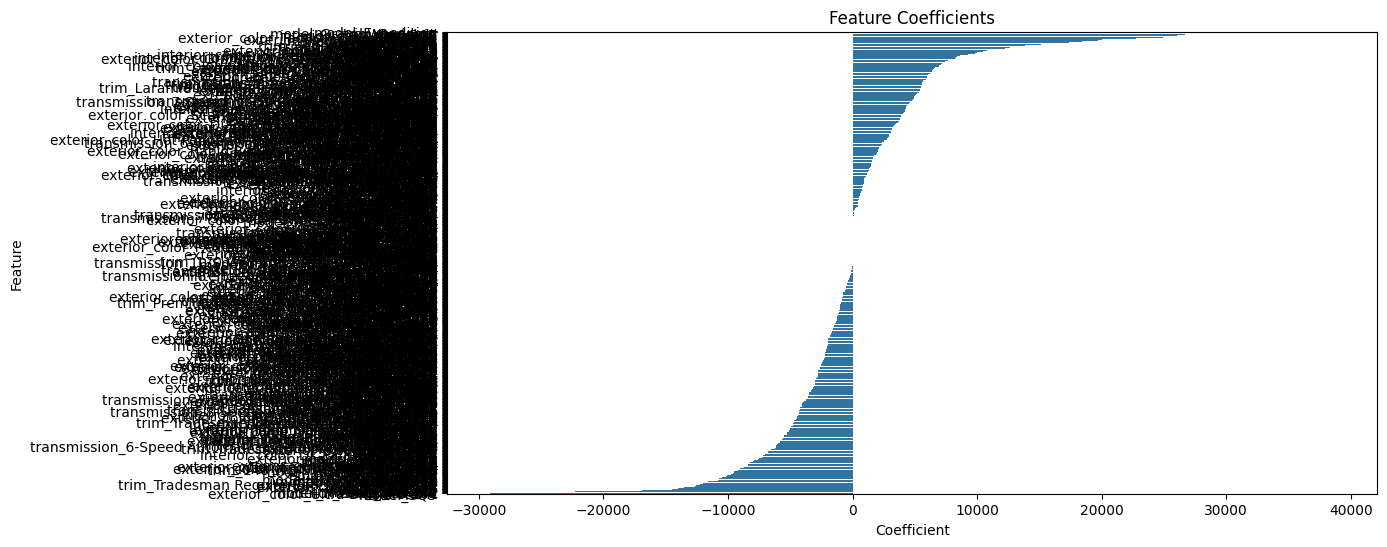

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

#plotting the actual vs predicted
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

#coefficients plot
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title("Feature Coefficients")
plt.show()

The linear regression model performs strongly explaining 80% of the variation in vehicle price.
The mean squared error is 4742 which the predictions are withing  $4742 of the true price
The root mean squared error is 7792 which mean with larger errors around £7,800 for rare or luxury cars.